<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Boris Panes</em><br>

</div>

### Análisis de Datos: Tarea 01
#### Integrantes: 
` Mariangel Arrieta, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama `

#### 1. Importación de Librerias

In [1]:
import pandas as pd               #Manejo de datos en Tablas
import numpy as np
import matplotlib.pyplot as plt   #Creación de visualizaciones 
import seaborn as sns             #Creación de visualizaciones  
import missingno as msgn          #Visualizacion de NaNs 
from sklearn.preprocessing import MinMaxScaler #Para Normalizar la data
from sklearn.preprocessing import StandardScaler #Para Estandarizar la data

sns.set_theme() #inicializacion de tematica de seaborn

#### 2. Lectura de archivo

In [2]:
# Ruta relativa al archivo
ruta_archivo = r'.\Data\2023-03-08 Precios Casas RM.csv'
df = pd.read_csv(ruta_archivo)
df.columns = df.columns.str.replace(' ', '_') # Normalizar los nombres
df.columns = df.columns.str.lower()
# Mostrar las primeras filas del DataFrame
df.head()

,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking,id,realtor
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades


#### 3. Análisis exploratorio

In [3]:
# Recopilación de información básica sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price_clp   7779 non-null   int64  
 1   price_uf    7779 non-null   int64  
 2   price_usd   7779 non-null   int64  
 3   comuna      7779 non-null   object 
 4   ubicacion   7779 non-null   object 
 5   dorms       7779 non-null   int64  
 6   baths       7714 non-null   float64
 7   built_area  7533 non-null   float64
 8   total_area  7571 non-null   float64
 9   parking     5489 non-null   float64
 10  id          7779 non-null   int64  
 11  realtor     7184 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 729.4+ KB


In [4]:
# Resumen estadistico de las variables numericas
df.describe()

,price_clp,price_uf,price_usd,dorms,baths,built_area,total_area,parking,id
count,7.779000e+03,7779.000000,7.779000e+03,7779.000000,7714.000000,7533.000000,7571.000000,5489.000000,7.779000e+03
mean,3.642481e+08,10234.571153,4.536091e+05,3.994087,2.653746,229.923669,807.919826,2.980506,9.910828e+06
std,3.868810e+08,10870.491584,4.817945e+05,1.622821,1.465103,1676.898812,9050.893115,17.749384,2.046317e+06
min,2.085000e+03,0.000000,3.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.213620e+06
25%,1.200000e+08,3372.000000,1.494400e+05,3.000000,2.000000,85.000000,129.500000,1.000000,8.563078e+06
50%,2.050000e+08,5760.000000,2.552930e+05,4.000000,2.000000,128.000000,210.000000,2.000000,1.054807e+07
75%,4.911420e+08,13800.000000,6.116340e+05,5.000000,3.000000,200.000000,443.000000,3.000000,1.152463e+07
max,5.516450e+09,155000.000000,6.869801e+06,27.000000,29.000000,120000.000000,678000.000000,1269.000000,1.234149e+07


In [5]:
# Dimensiones del df
df.shape

(7779, 12)

In [6]:
# Total de elementos únicos por cada columna.
df.nunique()

price_clp     1897
price_uf      1801
price_usd     1877
comuna          51
ubicacion     6620
dorms           22
baths           15
built_area     573
total_area    1099
parking         26
id            7778
realtor        278
dtype: int64

### 4. Limpieza de datos
##### 4.1. Busqueda de Valores Nulos

In [7]:
# Se verifica la cantidad de datos faltantes
df.isna().sum()

price_clp        0
price_uf         0
price_usd        0
comuna           0
ubicacion        0
dorms            0
baths           65
built_area     246
total_area     208
parking       2290
id               0
realtor        595
dtype: int64

<Axes: >

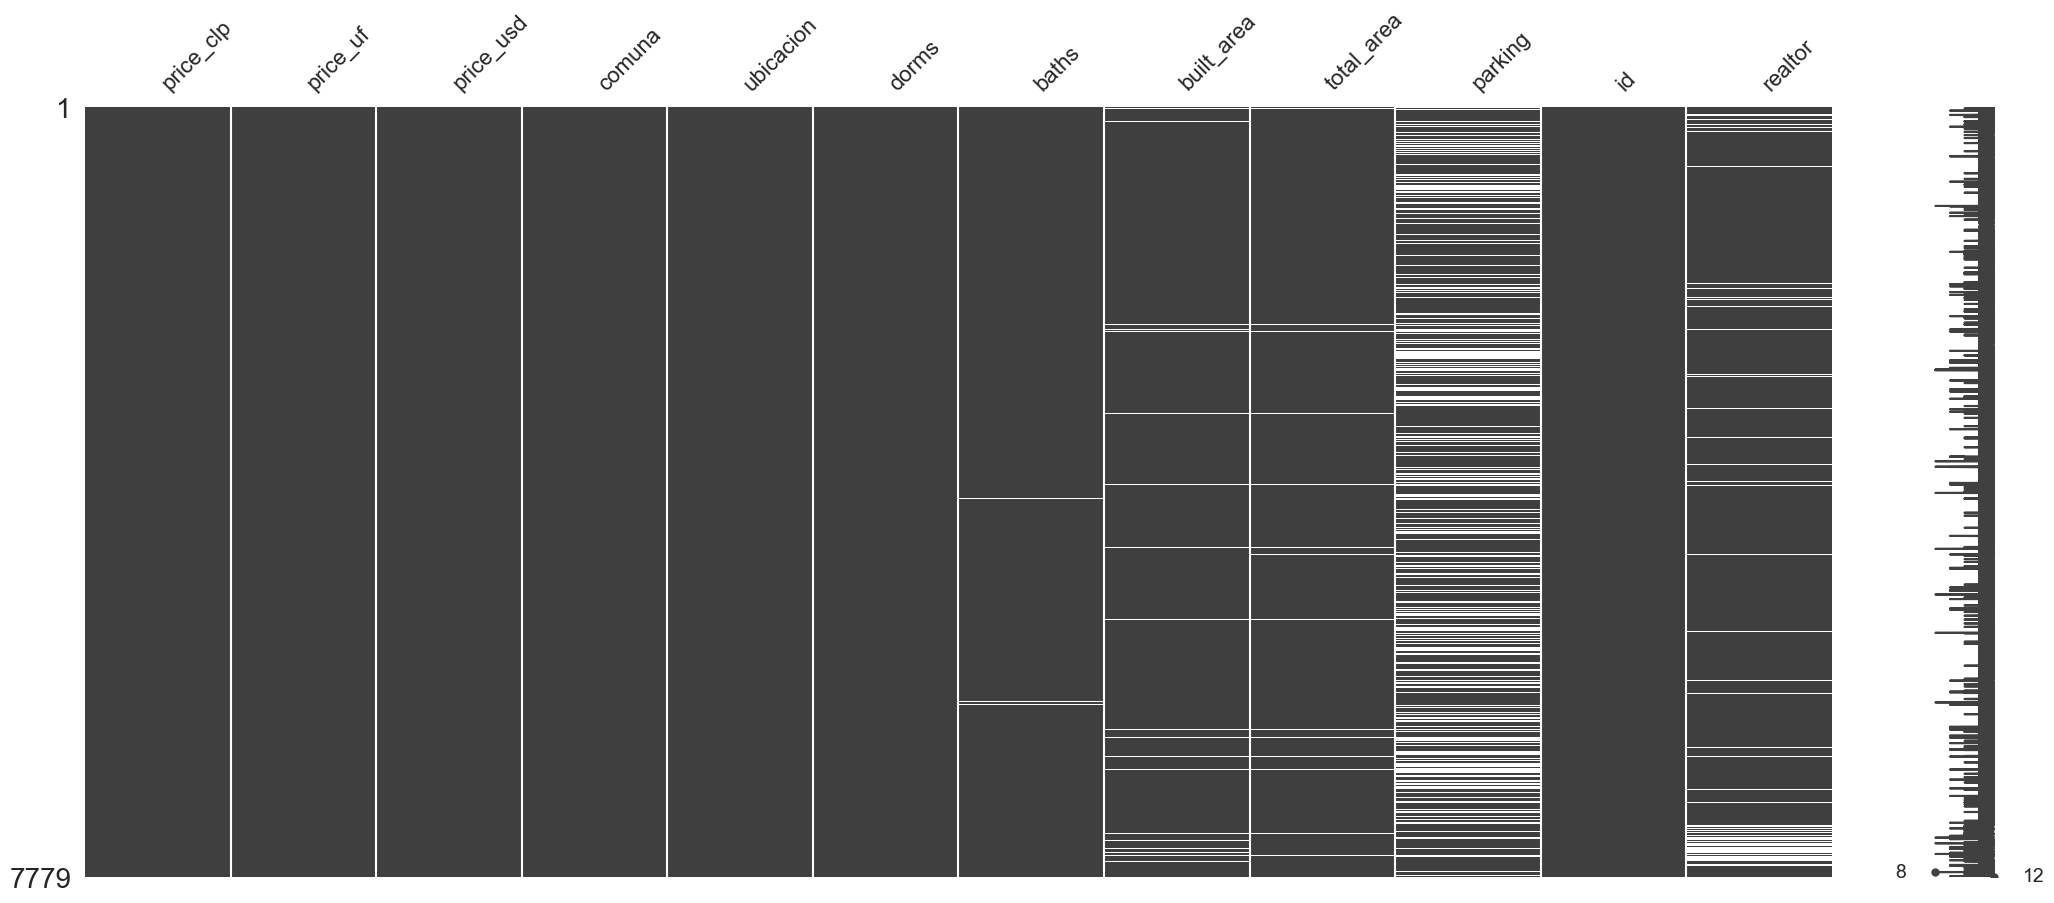

In [8]:
# Se visualiza los Nulos
msgn.matrix(df)

##### 4.2 Protocolo de acción con respecto a los Nulos
**Parking**

In [9]:
df[df["parking"]==0] # Se busca las propiedades sin Parking

,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking,id,realtor



**Decisión:** 

Dado que no se encontraron valores numéricos iguales a 0 en la característica "parking", se concluye que los valores NaN en esta misma característica pueden ser reemplazados por 0. 

**Justificación:** 
* La ausencia de ceros sugiere que NaN en este contexto indica la falta de datos o un valor no aplicable, que puede ser interpretado como una ausencia de la característica a la hora de realizar el web scraping.


In [10]:
df["parking"].fillna(0, inplace=True) # Se remplazan los NaNs de parking por 0

**Realtor**

In [11]:
df.realtor.dtype

dtype('O')

**Decisión:** Se ha tomado la determinación de excluir la columna "realtor" del modelo de regresión lineal. 

**Justificación:**
* **Naturaleza categórica:** La variable "realtor" es de naturaleza categórica (nominal), lo cual dificulta su incorporación directa en un modelo de regresión lineal.
* **Valores faltantes:** La presencia significativa de valores NaN en esta columna podría afectar la precisión de las predicciones.
* **Irrelevancia para la predicción:** Se considera que la identidad del realtor no tiene una relación causal directa con la variable objetivo que se busca predecir en este análisis.

**Implicaciones:**
* Al eliminar esta columna, se simplifica el modelo y se reduce el riesgo de overfitting.
* Seria valido considerar si la información contenida en "realtor" podría ser relevante para otros análisis, como por ejemplo, un estudio exploratorio de los diferentes realtors, sus areas de trabajo o un modelo de clasificación.

In [12]:
df.drop("realtor", axis=1, inplace=True) # Se descarta la columna Realtor

In [13]:
df.isna().sum()/df.shape[0]*100 # Se calcula el % de los datos que quedan nulos

price_clp     0.000000
price_uf      0.000000
price_usd     0.000000
comuna        0.000000
ubicacion     0.000000
dorms         0.000000
baths         0.835583
built_area    3.162360
total_area    2.673866
parking       0.000000
id            0.000000
dtype: float64

**Decisión:** Se decide eliminar los valores nulos restantes en esta etapa inicial del análisis.

**Justificación:**
* **Baja proporción:** La proporción de valores nulos es relativamente pequeña en comparación con el tamaño total del dataset. (0.8 al 3%)
* **Primera iteración:** En esta primera iteración, el objetivo es obtener un modelo inicial para luego realizar ajustes posteriores.
* **Impacto limitado:** Se considera que la eliminación de estos nulos tendrá un impacto limitado en la precisión y generalización del modelo.

**Consideraciones futuras:**
* En futuras iteraciones, se puede explorar métodos de imputación de valores nulos para mejorar la calidad del dataset y la robustez del modelo.

In [14]:
df.dropna(inplace=True) #se descarta el resto de los Nans

<Axes: >

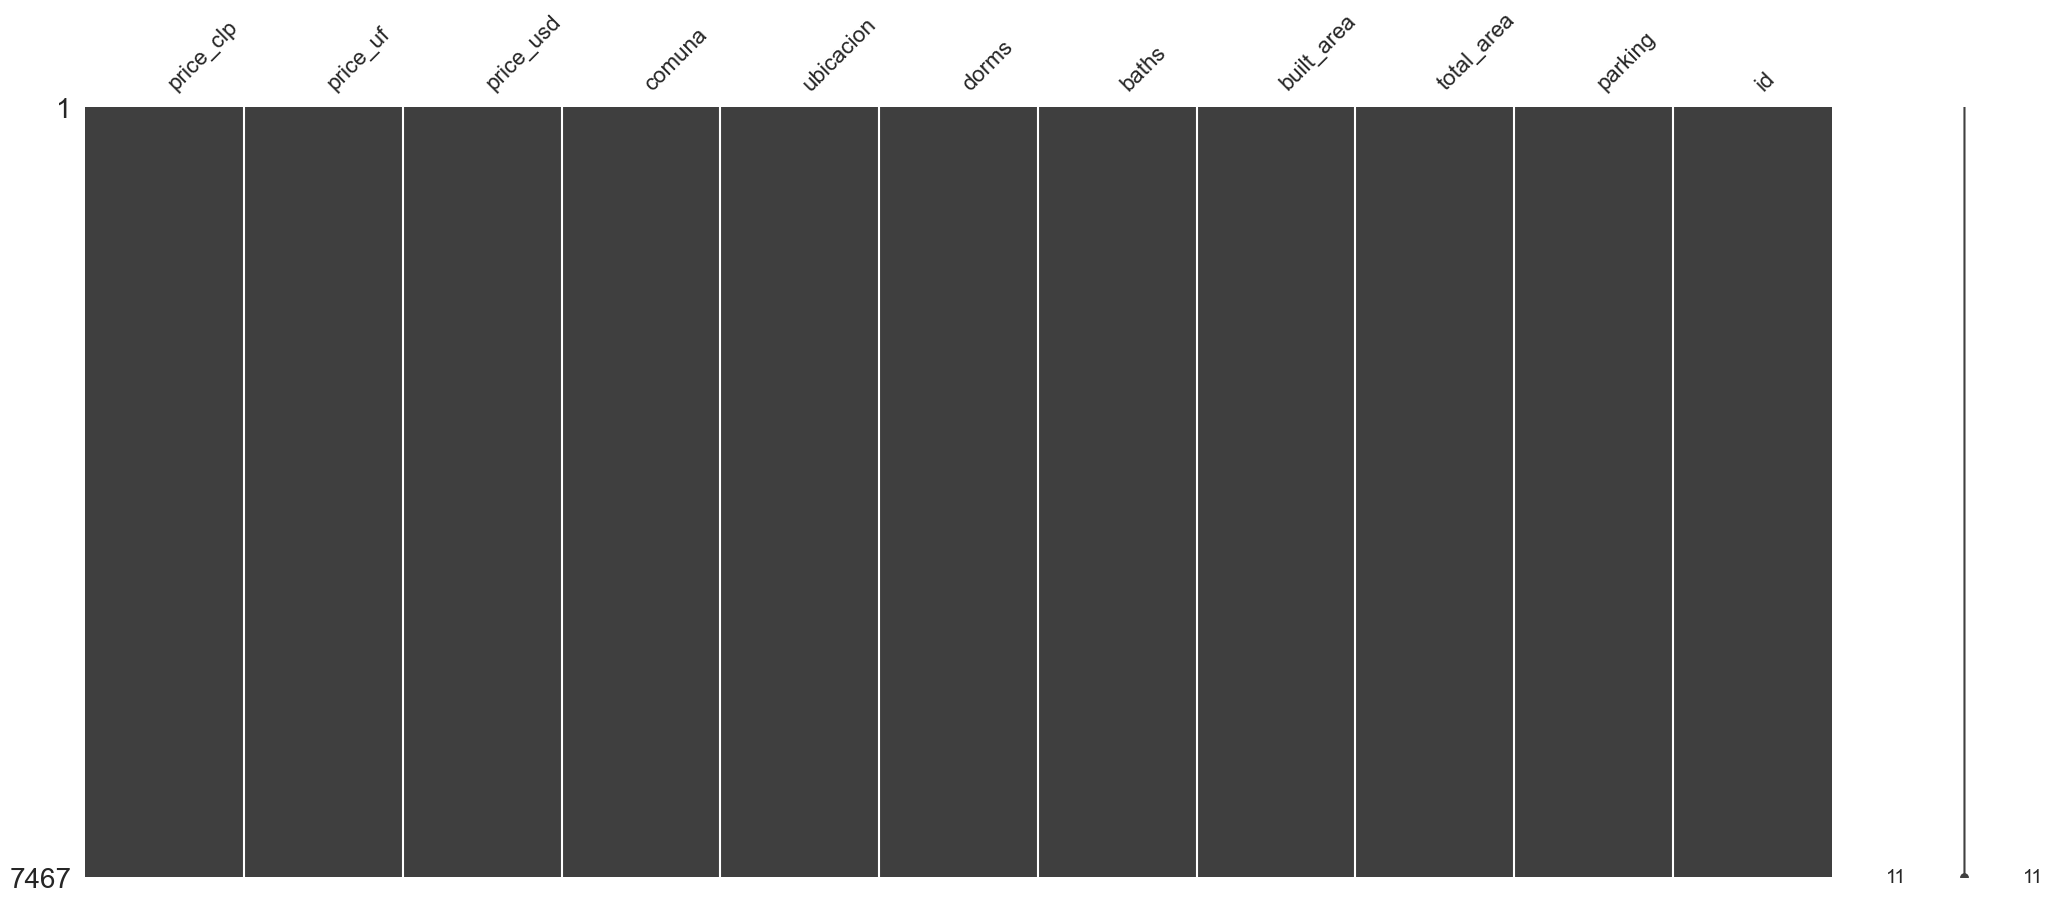

In [15]:
msgn.matrix(df)

##### 4.3 Distinción de Tipos

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7467 entries, 0 to 7778
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price_clp   7467 non-null   int64  
 1   price_uf    7467 non-null   int64  
 2   price_usd   7467 non-null   int64  
 3   comuna      7467 non-null   object 
 4   ubicacion   7467 non-null   object 
 5   dorms       7467 non-null   int64  
 6   baths       7467 non-null   float64
 7   built_area  7467 non-null   float64
 8   total_area  7467 non-null   float64
 9   parking     7467 non-null   float64
 10  id          7467 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 700.0+ KB


|Variable|	Tipo|	Descripción|
|---|---|---|
|price_clp|	Numérico (entero)|	Precio en pesos chilenos|
|price_uf|	Numérico (entero)|	Precio en Unidades de Fomento|
price_usd|	Numérico (entero)|	Precio en dólares estadounidenses|
|dorms|	Numérico (entero)|	Número de dormitorios|
|baths|	Numérico (flotante)|	Número de baños|
|built_area|	Numérico (flotante)|	Área construida (m²)|
|total_area|	Numérico (flotante)|	Área total (m²)|
|parking|	Numérico (flotante)|	Número de estacionamientos|
|id|	Categórico Numérico|	Identificador único interno|
|comuna|	Categórico|	Nombre de la comuna|
|ubicacion|	Categórico|	Ubicación específica|

##### 4.4 Busqueda y manejo de duplicados

In [17]:
# Verificar datos duplicados
duplicados = df.duplicated().sum()

# Porcentaje de data duplicada
porcentaje = df.duplicated().sum() / df.shape[0] * 100

print(f'{duplicados} el numero de filas duplicadas representa {porcentaje.round(2)}% del total de la data.')

1 el numero de filas duplicadas representa 0.01% del total de la data.


In [18]:
# Borramos dato duplicado y creamos un nuevo df1
df1 = df.drop_duplicates(keep='first').copy()
df1.drop("id",axis=1, inplace=True)
# Mostramos las primeras filas del df1
df1.head()

,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0


##### 4.5 Normalización

In [19]:
# Se selecciona las columnas numéricas
num_columns = df1.select_dtypes(include=np.number)

# Se normaliza los valores usando min-max scaling
minmax_scaler = MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(num_columns)

# Se crea df con datos normalizados
df1_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)
df1_normalized.head(10)

,price_clp,price_uf,price_usd,dorms,baths,built_area,total_area,parking
0,0.074193,0.074194,0.074193,0.230769,0.107143,0.003192,0.001078,0.002364
1,0.019034,0.019032,0.019034,0.038462,0.000000,0.000925,0.000212,0.000788
2,0.023225,0.023226,0.023225,0.076923,0.000000,0.000483,0.000357,0.001576
3,0.013595,0.013594,0.013595,0.076923,0.000000,0.000850,0.000106,0.000788
4,0.009607,0.009606,0.009607,0.038462,0.000000,0.000467,0.000097,0.000788
5,0.017040,0.017039,0.017040,0.038462,0.000000,0.000592,0.000192,0.000000
6,0.013595,0.013594,0.013595,0.076923,0.000000,0.000575,0.000117,0.001576
7,0.019034,0.019032,0.019034,0.038462,0.000000,0.000408,0.000176,0.000788
8,0.013777,0.013774,0.013777,0.076923,0.000000,0.000592,0.000105,0.000788
9,0.013777,0.013774,0.013777,0.076923,0.000000,0.000375,0.000131,0.000788


##### 4.6 Estandarización

In [20]:
# Estandarizamos la data
std_scaler = StandardScaler()
std_data = std_scaler.fit_transform(num_columns) # num_columns es las columnas numericas de df1

# Crear df con datos normalizados
df1_std = pd.DataFrame(std_data, columns=num_columns.columns)
df1_std.head(10)

,price_clp,price_uf,price_usd,dorms,baths,built_area,total_area,parking
0,0.101257,0.101257,0.101257,1.850530,0.900251,0.106354,-0.007818,0.056504
1,-0.681651,-0.681676,-0.681650,-1.241832,-1.140828,-0.070951,-0.072415,-0.074426
2,-0.622154,-0.622155,-0.622153,-0.623360,-1.140828,-0.105500,-0.061631,-0.008961
3,-0.758839,-0.758870,-0.758838,-0.623360,-1.140828,-0.076818,-0.080339,-0.074426
4,-0.815444,-0.815461,-0.815445,-1.241832,-1.140828,-0.106803,-0.080999,-0.074426
5,-0.709953,-0.709971,-0.709953,-1.241832,-1.140828,-0.097025,-0.073956,-0.139891
6,-0.758839,-0.758870,-0.758838,-0.623360,-1.140828,-0.098329,-0.079568,-0.008961
7,-0.681651,-0.681676,-0.681650,-1.241832,-1.140828,-0.111366,-0.075166,-0.074426
8,-0.756266,-0.756306,-0.756266,-0.623360,-1.140828,-0.097025,-0.080449,-0.074426
9,-0.756266,-0.756306,-0.756266,-0.623360,-1.140828,-0.113974,-0.078468,-0.074426


##### 4.6 Ingenieria de columnas

**Decisión:** Será de poco uso considerar las 3 monedas para analizar, por lo que solo se utilizará la UF para Ingeniería de columnas.

In [21]:
df2=df1.copy()
df2["price_built_m2_uf"] = df2["price_uf"]/df2["built_area"] 
df2["price_total_m2_uf"] = df2["price_uf"]/df2["total_area"]
df2["price_parking_uf"] = df2["price_uf"]/df2["parking"]
df2["price_dorms_uf"] = df2["price_uf"]/df2["dorms"]
df2["price_baths_uf"] = df2["price_uf"]/df2["baths"]

* **price_built_m2_uf**  
    - Descripción: Precio por metro cuadrado construido en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por su área construida.  
    - Significado: Esta variable proporciona una medida del valor de la propiedad por unidad de área construida, lo que puede ser útil para comparar propiedades de diferentes tamaños.

* **price_total_m2_uf**  
    - Descripción: Precio por metro cuadrado total en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por su área total.  
    - Significado: Esta variable proporciona una medida del valor de la propiedad por unidad de área total, incluyendo áreas comunes como estacionamientos y jardines.  

* **price_parking_uf**  
    - Descripción: Precio por estacionamiento en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por el número de estacionamientos.  
    - Significado: Esta variable proporciona una medida del valor de cada estacionamiento en la propiedad.  

* **price_dorms_uf**  
    - Descripción: Precio por dormitorio en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por el número de dormitorios.  
    - Significado: Esta variable proporciona una medida del valor de cada dormitorio en la propiedad.  

* **price_baths_uf**  
    - Descripción: Precio por baño en Unidades de Fomento (UF).  
    - Cálculo: Se divide el precio total de la propiedad en UF por el número de baños.  
    - Significado: Esta variable proporciona una medida del valor de cada baño en la propiedad.  

In [22]:
df2.head()

,price_clp,price_uf,price_usd,comuna,ubicacion,dorms,baths,built_area,total_area,parking,price_built_m2_uf,price_total_m2_uf,price_parking_uf,price_dorms_uf,price_baths_uf
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,29.947917,15.710383,3833.333333,1642.857143,2875.0
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,26.339286,20.344828,2950.000000,1475.000000,2950.0
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,61.016949,14.814815,1800.000000,1200.000000,3600.0
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,20.456311,28.863014,2107.000000,702.333333,2107.0
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,26.122807,22.223881,1489.000000,744.500000,1489.0


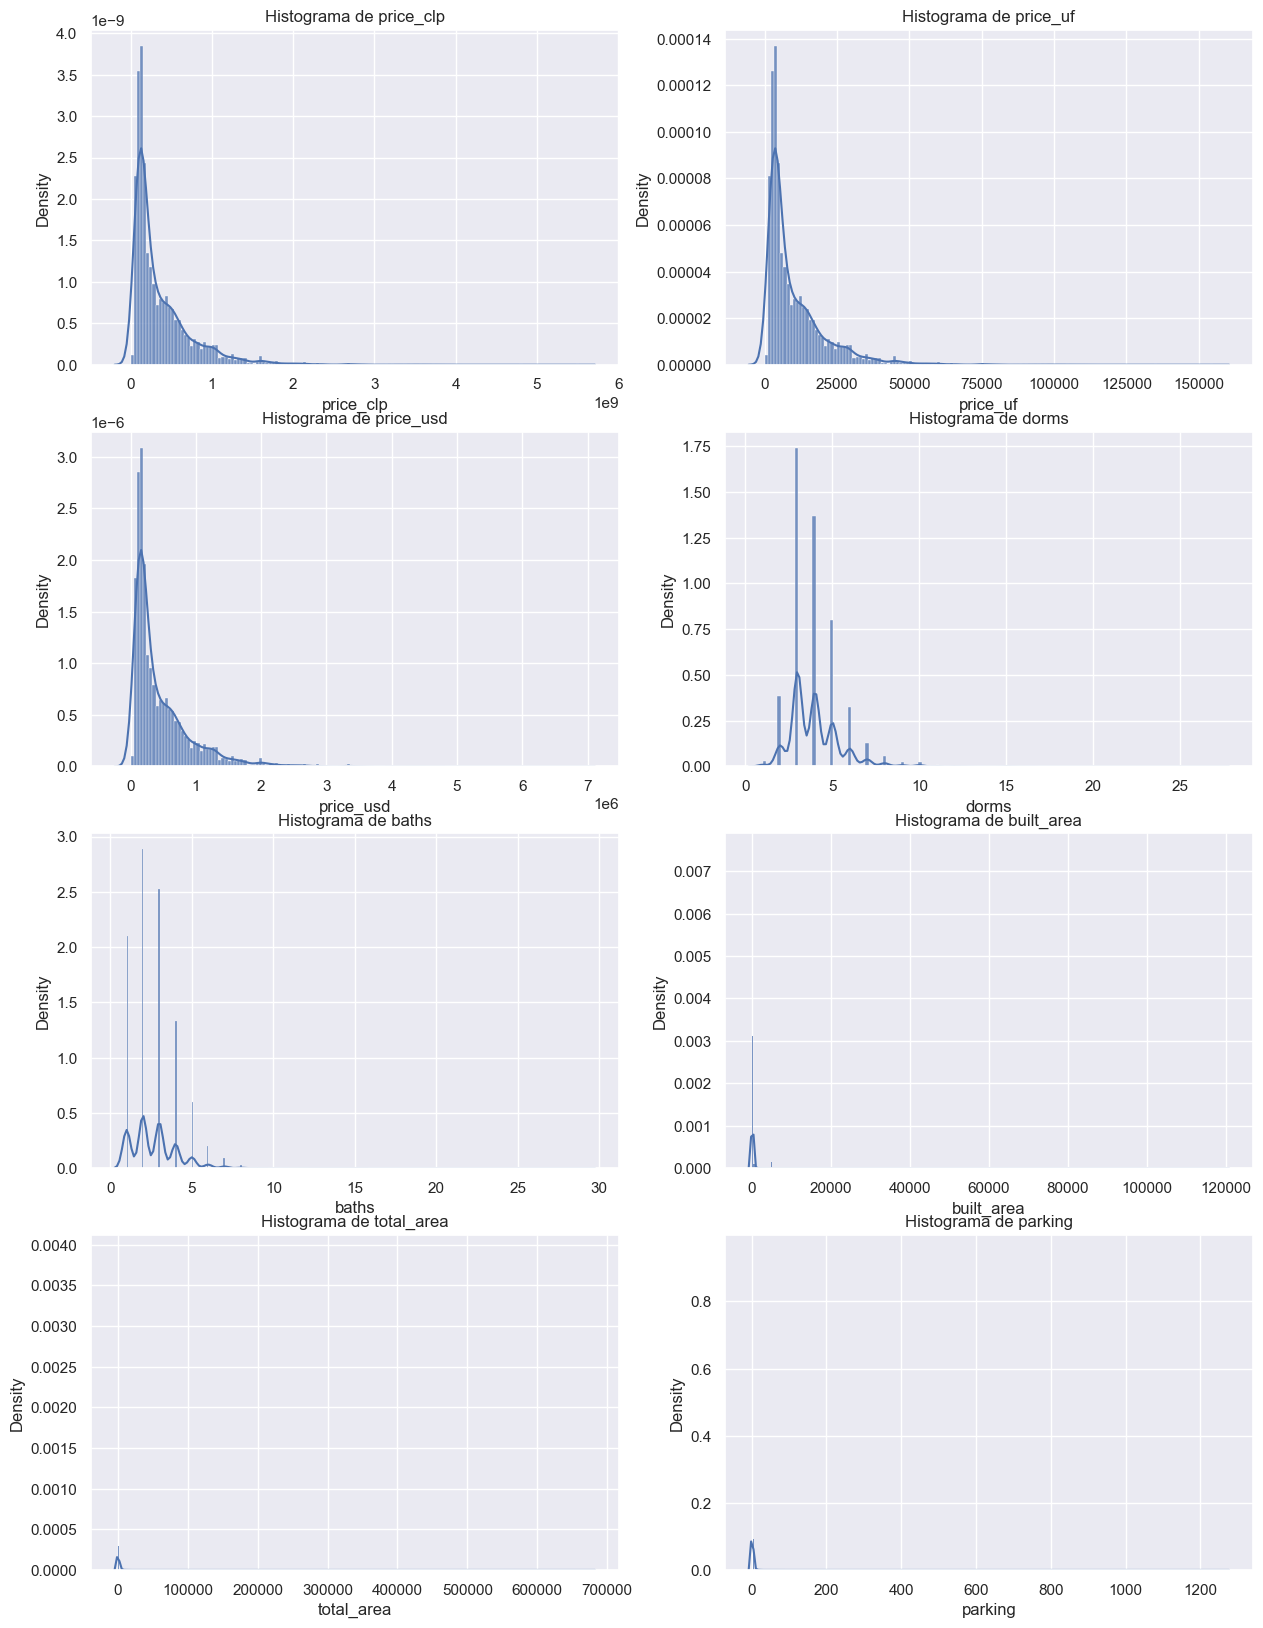

In [23]:

# Definir el tamaño de la figura
fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(15, 20), squeeze=False)  # Crear una cuadrícula de gráficos (4 filas, 2 columnas)
# Iterar sobre cada columna numérica para crear Histograma
for ax, column in zip(axs.flat, num_columns.columns):
    
    sns.histplot(num_columns[column],ax=ax, stat="density") #si les va muy lento borrar stat="density" y poner bins=40 o algo asi
    sns.kdeplot(num_columns[column],ax=ax)
    ax.set_title(f'Histograma de {column}')

# Ajustar el espacio entre los gráficos
plt.tight_layout
plt.show()


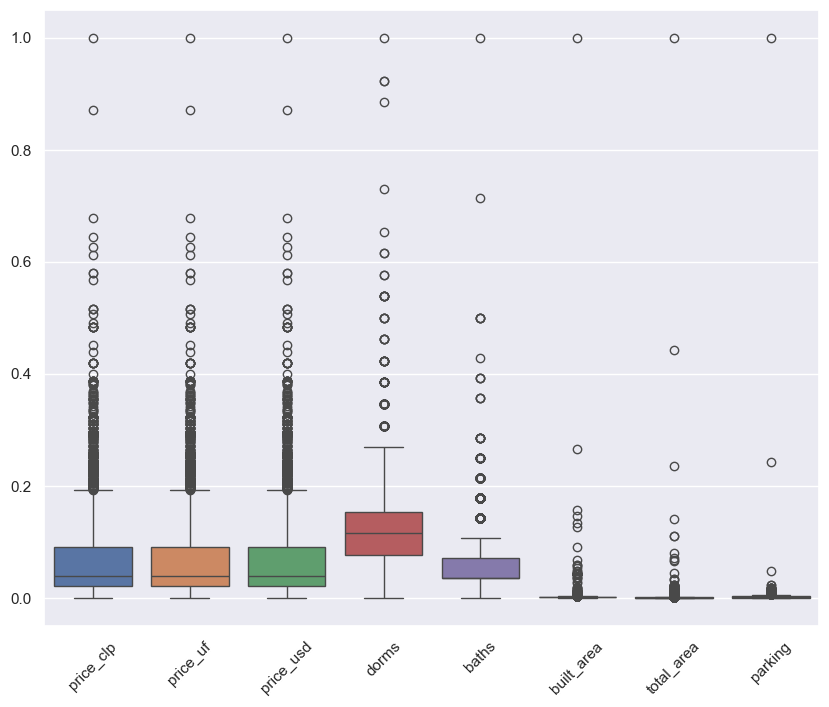

In [24]:
# Crear un boxplot para visualizar posibles Outliers

plt.figure(figsize=(10,8))
sns.boxplot(data= df1_normalized)
plt.xticks(rotation=45)


plt.show()

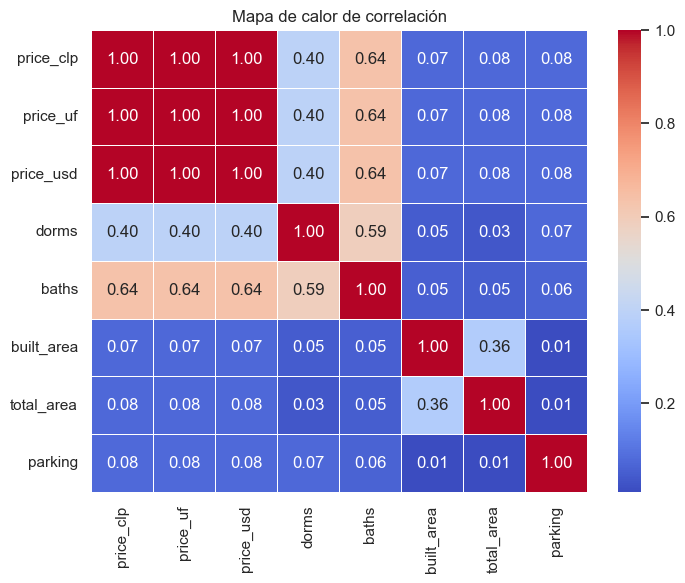

In [25]:
# Calcular la matriz de correlación
correlation_matrix = num_columns.corr(numeric_only=True)

# Crear un mapa de calor para mostrar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlación')
plt.show()